In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "drive/My Drive/ML Assignments/midterm/Dataset_Realestate.csv"
df = pd.read_csv(path)
df.head(5)

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url
0,205,70983496,"109 Sunrise Fls, Cibolo, TX 78108",29.599431,-98.254866,296000.0,USD,3.0,3.0,2294.0 sqft,NaN,270100.0,2024.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/41ca4905859...,House for sale,Opendoor Brokerage LLC,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/109-Sunrise...,https://www.zillow.com/homes/TX_rb/6_p/
1,711,30429260,"299 Mount Whitney Way, Lake Placid, NY 12946",44.306944,-73.950285,1995000.0,USD,5.0,4.0,3000.0 sqft,NaN,NaN,NaN,0.0,NaN,False,https://photos.zillowstatic.com/fp/3071787e4e5...,House for sale,"Listing by: Merrill L. Thomas, Inc.",https://www.zillow.com/homes/NY_rb/,https://www.zillow.com/homedetails/299-Mount-W...,https://www.zillow.com/homes/NY_rb/18_p/
2,66,97629907,"2910 Persimmon Grv, Richmond, TX 77469",29.557442,-95.751786,425000.0,USD,3.0,2.0,2575.0 sqft,NaN,436000.0,2967.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/f4716b346d1...,House for sale,CENTURY 21 Western Realty,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/2910-Persim...,https://www.zillow.com/homes/TX_rb/2_p/
3,222,240296342,"19251 E State Route 106, Belfair, WA 98528",47.427678,-122.855113,895000.0,USD,2.0,2.0,1248.0 sqft,NaN,NaN,1969.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/690e2ee9c08...,Active,NaN,https://www.zillow.com/homes/WA_rb/,https://www.zillow.com/homedetails/19251-E-Sta...,https://www.zillow.com/homes/WA_rb/6_p/
4,444,2076995275,"Clover Plan, The Alpine Collection at Altaira ...",39.813670,-104.765885,391500.0,USD,3.0,4.0,1752.0 sqft,NaN,NaN,1756.0,9.0,NaN,False,https://photos.zillowstatic.com/fp/9b2ae0d3768...,New construction,NaN,"https://www.zillow.com/homes/denver,-co_rb/",https://www.zillow.com/community/alpine-collec...,"https://www.zillow.com/homes/denver,-co_rb/12_p/"


In [4]:
print(df.isnull().sum()) 
print(df.isnull().mean())


def find_irrelevant_cols(data):
    col_null_sum = df.isnull().sum().to_list()
    df.isnull().mean()
    for (i,j) in col_null_mean:
        if j > 0.7:
          print(i)

rank                  0
property_id           0
address               0
latitude            116
longitude           116
price                17
currency              0
bathrooms           548
bedrooms            464
area                600
land_area          5447
zestimate          1922
rent_zestimate     1355
days_on_zillow        4
sold_date          5890
is_zillow_owned       0
image                 0
listing_type          0
broker_name        2515
input                 0
property_url          0
listing_url           0
dtype: int64
rank               0.000000
property_id        0.000000
address            0.000000
latitude           0.019694
longitude          0.019694
price              0.002886
currency           0.000000
bathrooms          0.093039
bedrooms           0.078778
area               0.101868
land_area          0.924788
zestimate          0.326316
rent_zestimate     0.230051
days_on_zillow     0.000679
sold_date          1.000000
is_zillow_owned    0.000000
image      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5890 entries, 0 to 5889
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             5890 non-null   int64  
 1   property_id      5890 non-null   int64  
 2   address          5890 non-null   object 
 3   latitude         5774 non-null   float64
 4   longitude        5774 non-null   float64
 5   price            5873 non-null   float64
 6   currency         5890 non-null   object 
 7   bathrooms        5342 non-null   float64
 8   bedrooms         5426 non-null   float64
 9   area             5290 non-null   object 
 10  land_area        443 non-null    object 
 11  zestimate        3968 non-null   float64
 12  rent_zestimate   4535 non-null   float64
 13  days_on_zillow   5886 non-null   float64
 14  sold_date        0 non-null      float64
 15  is_zillow_owned  5890 non-null   bool   
 16  image            5890 non-null   object 
 17  listing_type  

In [6]:
df.zestimate.fillna(df.price, inplace=True)

In [7]:
df['area'] = df['area'].apply(lambda a: (str(a).replace("sqft", ""))).astype(float)

In [8]:
df.area.fillna(0,inplace=True)

In [9]:
df.info()
#df.drop(['sold_date'],axis=1, inplace=True)
df.drop(['address', 'latitude','longitude','rent_zestimate','listing_type', 'input', 'property_url', 'listing_url'], axis=1, inplace=True)
#df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5890 entries, 0 to 5889
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             5890 non-null   int64  
 1   property_id      5890 non-null   int64  
 2   address          5890 non-null   object 
 3   latitude         5774 non-null   float64
 4   longitude        5774 non-null   float64
 5   price            5873 non-null   float64
 6   currency         5890 non-null   object 
 7   bathrooms        5342 non-null   float64
 8   bedrooms         5426 non-null   float64
 9   area             5890 non-null   float64
 10  land_area        443 non-null    object 
 11  zestimate        5873 non-null   float64
 12  rent_zestimate   4535 non-null   float64
 13  days_on_zillow   5886 non-null   float64
 14  sold_date        0 non-null      float64
 15  is_zillow_owned  5890 non-null   bool   
 16  image            5890 non-null   object 
 17  listing_type  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5890 entries, 0 to 5889
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             5890 non-null   int64  
 1   property_id      5890 non-null   int64  
 2   price            5873 non-null   float64
 3   currency         5890 non-null   object 
 4   bathrooms        5342 non-null   float64
 5   bedrooms         5426 non-null   float64
 6   area             5890 non-null   float64
 7   land_area        443 non-null    object 
 8   zestimate        5873 non-null   float64
 9   days_on_zillow   5886 non-null   float64
 10  sold_date        0 non-null      float64
 11  is_zillow_owned  5890 non-null   bool   
 12  image            5890 non-null   object 
 13  broker_name      3375 non-null   object 
dtypes: bool(1), float64(7), int64(2), object(4)
memory usage: 604.1+ KB


In [11]:
df.drop('currency',axis=1)

,rank,property_id,price,bathrooms,bedrooms,area,land_area,zestimate,days_on_zillow,sold_date,is_zillow_owned,image,broker_name
0,205,70983496,296000.0,3.0,3.0,2294.0,NaN,270100.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/41ca4905859...,Opendoor Brokerage LLC
1,711,30429260,1995000.0,5.0,4.0,3000.0,NaN,1995000.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/3071787e4e5...,"Listing by: Merrill L. Thomas, Inc."
2,66,97629907,425000.0,3.0,2.0,2575.0,NaN,436000.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/f4716b346d1...,CENTURY 21 Western Realty
3,222,240296342,895000.0,2.0,2.0,1248.0,NaN,895000.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/690e2ee9c08...,NaN
4,444,2076995275,391500.0,3.0,4.0,1752.0,NaN,391500.0,9.0,NaN,False,https://photos.zillowstatic.com/fp/9b2ae0d3768...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885,666,48804042,680000.0,3.0,3.0,1770.0,NaN,670900.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/6257ffb2491...,NaN
5886,594,2068426967,644990.0,4.0,4.0,2157.0,NaN,644990.0,17.0,NaN,False,https://photos.zillowstatic.com/fp/a1758482c49...,NaN
5887,637,26185150,210000.0,2.0,4.0,1576.0,NaN,217700.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/192eb9595d3...,Watters International Realty
5888,146,61322711,850000.0,3.0,2.0,1860.0,NaN,858569.0,3.0,NaN,False,https://photos.zillowstatic.com/fp/9788bda0cd2...,NaN


In [12]:
df.isnull().sum()

rank                  0
property_id           0
price                17
currency              0
bathrooms           548
bedrooms            464
area                  0
land_area          5447
zestimate            17
days_on_zillow        4
sold_date          5890
is_zillow_owned       0
image                 0
broker_name        2515
dtype: int64

In [13]:
df.drop(['currency', 'land_area'], axis=1, inplace=True)

In [14]:
df.fillna(999, inplace=True)

In [15]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split 
# check xgboost version
import xgboost

In [17]:
df.drop(['image', 'broker_name'], axis=1, inplace=True)

In [18]:
pip install xgboost

In [19]:
pip install catboost

     |████████████████████████████████| 76.3 MB 1.1 MB/s 


### Apply the Regressor: XGBoost, CatBoost and LGBM

In [20]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
def regresssorloop(data,feat):


  kernel = DotProduct() + WhiteKernel()
 
  names = ["XGBRegressor","CatBoostRegressor","LGBMRegressor"]
 #CatBoostRegressor(verbose=0, n_estimators=100) 
  regressors = [ XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8), CatBoostRegressor(verbose=0, n_estimators=100),LGBMRegressor()]

  gbm = lgb.LGBMRanker()
  
  X =  data[['area','bedrooms','bathrooms']].values
  X = StandardScaler().fit_transform(data)
  y = data['price'].values
  
  X_train, X_test, y_train, y_test = \
      train_test_split(X, y, test_size=.2)

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
  query_train = [X_train.shape[0]]
  query_val = [X_val.shape[0]]
  query_test = [X_test.shape[0]]

  max_score = 0.0
  max_class = ''
  # iterate over regressors
  for name, clf in zip(names, regressors):
     
      clf.fit(X_train, y_train)
      clf.fit(X_train, y_train)
      
      score = 100.0 * clf.score(X_test, y_test)
      pred = clf.predict(X_train)
      r2 = r2_score(y_train, pred)
      print('R2 SCORE = %.2f,' %(r2))
      print('regressors = %s, Score (test, accuracy) = %.2f,' %(name, score))
      
      if score > max_score:
          reg_best = clf
          max_score = score
          max_class = name

  print(80*'-' )
  print('Best --> regressors = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

In [21]:
feat=3
regresssorloop(df,feat)


[08:56:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:56:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 SCORE = 1.00,
regressors = XGBRegressor, Score (test, accuracy) = 98.49,
R2 SCORE = 1.00,
regressors = CatBoostRegressor, Score (test, accuracy) = 73.03,
R2 SCORE = 0.83,
regressors = LGBMRegressor, Score (test, accuracy) = 84.87,
--------------------------------------------------------------------------------
Best --> regressors = XGBRegressor, Score (test, accuracy) = 98.49


###Apply the classifiers: XGBoost,CatBoost and LGBM

In [29]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
def classifierloop(data):


  names = ["XGBClassifier","CatBoostClassifier","LGBMClassifier"]
  classifiers = [
      XGBClassifier(),
      CatBoostClassifier(verbose=0, n_estimators=100),
      LGBMClassifier()]
  X =  data[['area','bedrooms','bathrooms']].values
  X = StandardScaler().fit_transform(data)
  y = data['is_zillow_owned'].values

  X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)


  max_score = 0.0
  max_class = ''
  # iterate over classifiers
  for name, clf in zip(names, classifiers):
      clf.fit(X_train, y_train)
      score = 100.0 * clf.score(X_test, y_test)
      pred = clf.predict(X_train)
      # F1 Score matrix
      f1 = f1_score(y_train, pred, average='macro')
      print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
      print('F1 SCORE = %.2f,' %(f1))
      fig, ax = plt.subplots()
      cm = ConfusionMatrix(clf, classes=[0, 1], ax=ax)
      cm.fit(X_train, y_train)
      cm.score(X_test, y_test)
      cm.poof()

      if score > max_score:
          clf_best = clf
          max_score = score
          max_class = name
  #print('best clf =%s,' (clf_best))
  print(80*'-' )
  
  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
  print(80*'-' )
  #plot the output of the various algorithms

Classifier = XGBClassifier, Score (test, accuracy) = 100.00,
F1 SCORE = 1.00,


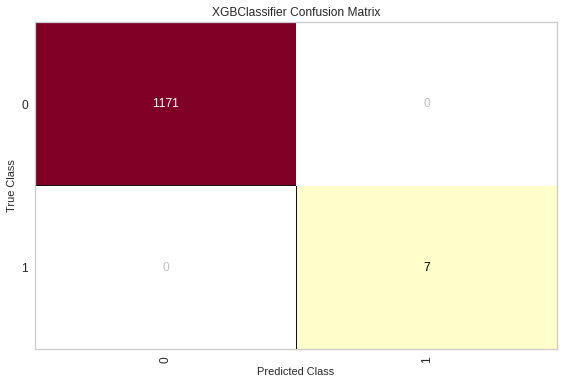

Classifier = CatBoostClassifier, Score (test, accuracy) = 100.00,
F1 SCORE = 1.00,


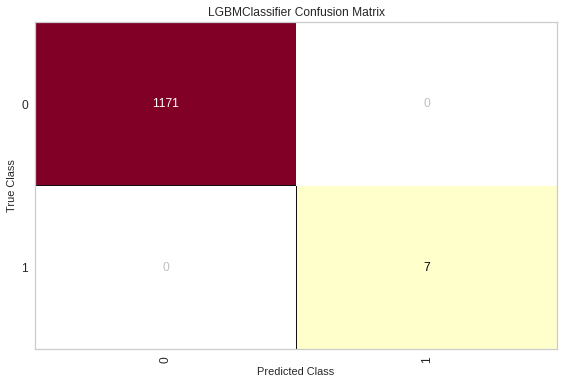

--------------------------------------------------------------------------------
Best --> Classifier = XGBClassifier, Score (test, accuracy) = 100.00
--------------------------------------------------------------------------------


In [30]:
classifierloop(df)

In [ ]:
from catboost.datasets import msrank_10k
train_df, test_df = msrank_10k()

X_train = train_df.drop([0, 1], axis=1).values
y_train = train_df[0].values
queries_train = train_df[1].values

X_test = test_df.drop([0, 1], axis=1).values
y_test = test_df[0].values
queries_test = test_df[1].values

In [ ]:
num_documents = X_train.shape[0]
print(num_documents)

10000


In [ ]:
X_train.shape[1]

136

In [ ]:
from collections import Counter
Counter(y_train).items()

dict_items([(2.0, 1326), (0.0, 5481), (1.0, 3000), (3.0, 142), (4.0, 51)])

In [ ]:
max_relevance = np.max(y_train)
y_train /= max_relevance
y_test /= max_relevance

In [ ]:
num_queries = np.unique(queries_train).shape[0]
num_queries

87

##CatBoostRanker


In [ ]:
from catboost import CatBoostRanker, Pool, MetricVisualizer
train = Pool(
    data=X_train,
    label=y_train,
    group_id=queries_train
)

test = Pool(
    data=X_test,
    label=y_test,
    group_id=queries_test
)

In [ ]:
default_parameters = {
    'iterations': 2000,
    'custom_metric': ['NDCG', 'PFound', 'AverageGain:top=10'],
    'verbose': False,
    'random_seed': 0,
}

parameters = {}

In [ ]:
def fit_model(loss_function, additional_params=None, train_pool=train, test_pool=test):
    parameters = deepcopy(default_parameters)
    parameters['loss_function'] = loss_function
    parameters['train_dir'] = loss_function
    
    if additional_params is not None:
        parameters.update(additional_params)
        
    model = CatBoostRanker(**parameters)
    model.fit(train_pool, eval_set=test_pool, plot=True)
    
    return model

In [ ]:
from copy import deepcopy
model = fit_model('RMSE', {'custom_metric': ['PrecisionAt:top=10', 'RecallAt:top=10', 'MAP:top=10']})

/usr/local/lib/python3.7/dist-packages/catboost/core.py:5806: RuntimeWarning: Regression loss ('RMSE') ignores an important ranking parameter 'group_id'
  warnings.warn("Regression loss ('{}') ignores an important ranking parameter 'group_id'".format(loss_function), RuntimeWarning)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
pip install xgboost

In [ ]:
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(test_size=.40, 
                        n_splits=1, 
                        random_state = 7).split(df, groups=df['price'])
X_train_inds, X_test_inds = next(gss)

train_data= df.iloc[X_train_inds]
X_train = train_data.loc[:, ~train_data.columns.isin(['price','rank'])]
y_train = train_data.loc[:, train_data.columns.isin(['rank'])]

# The model needs input, press query_id Sorted samples 
# And you need to give each query_id The number of samples 
groups = train_data.groupby('price').size().to_frame('size')['size'].to_numpy()

test_data= df.iloc[X_test_inds]

#We need to keep the id for later predictions
X_test = test_data.loc[:, ~test_data.columns.isin(['rank'])]
y_test = test_data.loc[:, test_data.columns.isin(['rank'])]

In [ ]:
import numpy as np
import pandas as pd
import lightgbm

df = pd.DataFrame({
    "query_id":[i for i in range(100) for j in range(10)],
    "var1":np.random.random(size=(1000,)),
    "var2":np.random.random(size=(1000,)),
    "var3":np.random.random(size=(1000,)),
    "relevance":list(np.random.permutation([0,0,0,0,0, 0,0,0,1,1]))*100
})

In [ ]:
train_df = df[:800]  # first 80%
validation_df = df[800:]  # remaining 20%

qids_train = train_df.groupby("query_id")["query_id"].count().to_numpy()
X_train = train_df.drop(["query_id", "relevance"], axis=1)
y_train = train_df["relevance"]

qids_validation = validation_df.groupby("query_id")["query_id"].count().to_numpy()
X_validation = validation_df.drop(["query_id", "relevance"], axis=1)
y_validation = validation_df["relevance"]

#LGBMRanker


In [ ]:
gbm = lightgbm.LGBMRanker(
    objective="lambdarank",
    metric="ndcg",
)

In [ ]:
gbm.fit(
    X=X_train,
    y=y_train,
    group=qids_train,
    eval_set=[(X_validation, y_validation)],
    eval_group=[qids_validation],
    eval_at=10,
    verbose=10,
)

[10]	valid_0's ndcg@10: 0.582414
[20]	valid_0's ndcg@10: 0.576533
[30]	valid_0's ndcg@10: 0.588261
[40]	valid_0's ndcg@10: 0.594179
[50]	valid_0's ndcg@10: 0.584067
[60]	valid_0's ndcg@10: 0.580406
[70]	valid_0's ndcg@10: 0.589134
[80]	valid_0's ndcg@10: 0.590322
[90]	valid_0's ndcg@10: 0.592986
[100]	valid_0's ndcg@10: 0.588378


LGBMRanker(metric='ndcg', objective='lambdarank')

##XGBRanker

In [ ]:
from xgboost import XGBRanker
xgbmodel = XGBRanker(max_depth=5, learning_rate=0.01, n_estimators=2000, n_jobs=-1, colsample_bytree=0.1)

from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(test_size=.20, n_splits=1, random_state = 7).split(df, groups=df['query_id'])
X_train_inds, X_test_inds = next(gss)
train_data= df.iloc[X_train_inds]
#groups = train_data.groupby('qids_train').size().to_frame('size')['size'].to_numpy()

print(len(groups))
print(len(train_data))

xgbmodel.fit(X_train, y_train, group=qids_train, verbose=True)

4680
800


XGBRanker(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
          n_estimators=2000)